# Tarea 1 Análisis Multivariado
## Daniel Acosta Imandt

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

from numpy.linalg import eig

Ejercicio 1

In [90]:
dfg = pd.read_csv('carc.txt', sep=' ', header=None)
dfg.columns = ['lts_gas', 'miles']
dfg.eval(r'miles_per_liter = miles / lts_gas', inplace=True)
dfg.head()
dfg.head()

,lts_gas,miles,miles_per_liter
0,1,22,22.0
1,1,17,17.0
2,1,22,22.0
3,2,17,8.5
4,2,23,11.5


In [91]:
dfg['miles_per_liter'].describe()

count    74.000000
mean     16.979730
std       6.178346
min       6.000000
25%      12.125000
50%      18.000000
75%      20.875000
max      34.000000
Name: miles_per_liter, dtype: float64

In [92]:
# primer y tercer cuartil
F_U = 20.875
F_L = 12.125

# f-dispersion
df = F_U - F_L

# barras externas
b_U = F_U + 1.5 * df
b_L = F_L - 1.5 * df

In [ ]:
print(b_U, b_L)

In [93]:
dfg.query('miles_per_liter <= @b_U')['miles_per_liter'].max()

34.0

In [95]:
dfg.query('miles_per_liter >= @b_L')['miles_per_liter'].min()

6.0

In [96]:
dfg['miles_per_liter'].mean()

16.97972972972973

ejercico 2

In [2]:
import csv

with open('/content/SwissBank 1.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split("\t") for line in stripped if line)
    with open('SwissBank 1.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('title', 'intro'))
        writer.writerows(lines)

In [3]:
import pandas as pd
df = pd.read_fwf('/content/SwissBank 1.txt')
df.to_csv('bank.csv')

In [4]:
df=pd.read_csv('bank.csv')
df.head()

,Unnamed: 0,214.8,131.0,131.1,9.0\t9.7\t141.0
0,0,214.6,129.7,129.7,8.1\t9.5\t141.7
1,1,214.8,129.7,129.7,8.7\t9.6\t142.2
2,2,214.8,129.7,129.6,7.5\t10.4\t142.0
3,3,215.0,129.6,129.7,10.4\t7.7\t141.8
4,4,215.7,130.8,130.5,9.0\t10.1\t141.4


In [5]:
bills = pd.read_csv('SwissBank 1.txt', sep='\t', header=None)
bills.columns = ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6']

true_bills = bills.iloc[:100, :]
false_bills = bills.iloc[100:, :]
bills.head()

,X_1,X_2,X_3,X_4,X_5,X_6
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8


In [6]:
fig = go.Figure()

fig.add_traces(
    go.Box(
        x=true_bills['X_1'],
        name='Genuinos',
        boxmean=True,
        marker_size=3,
        boxpoints='all',
        whiskerwidth=0.2,
        marker_color = 'lightseagreen',
        marker_line_outliercolor='rgba(219, 64, 82, 0.6)'
    )    
)

fig.add_traces(
    go.Box(
        x=false_bills['X_1'],
        name='Falsificaciones',
        boxmean=True,
        marker_size=3,
        boxpoints='all',
        whiskerwidth=0.2,
        marker_color = 'indianred',
        marker_line_outliercolor='rgba(219, 64, 82, 0.6)'
    )    
)

fig.update_layout(
    xaxis=dict(
        title='Largo del billete',
        title_font_size=18
    ),
    margin=dict(
        l=40,
        r=10,
        b=10,
        t=40,
    ),
    height=400,
    width=800,
    showlegend=False,
    template='plotly_white',
)

# fig.write_image('images/bills.pdf')

fig.show()

In [7]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, ' billetes verdaderos')]

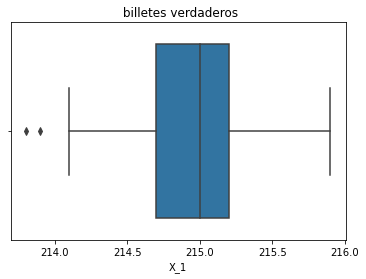

In [8]:
sns.boxplot(true_bills['X_1']).set(title=' billetes verdaderos')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, ' billetes falsos')]

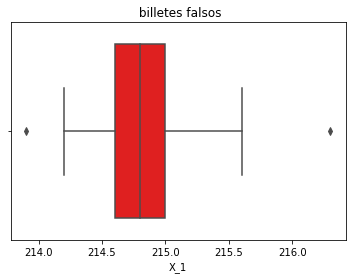

In [9]:
sns.boxplot(false_bills['X_1'],color='red',orient='h').set(title=' billetes falsos')

In [10]:
fig = go.Figure()

fig.add_traces(
    go.Box(
        x=true_bills['X_1'],
        name='Billetes verdaderos',
        boxmean=True,
        #marker_size=3,
        boxpoints='all',
        #whiskerwidth=0.2,
        marker_color = 'blue',
        marker_line_outliercolor='rgba(219, 64, 82, 0.6)'
    )    
)

fig.add_traces(
    go.Box(
        x=false_bills['X_1'],
        name='Billetes falsos',
        boxmean=True,
        #marker_size=3,
        boxpoints='all',
       # whiskerwidth=0.2,
        marker_color = 'red',
        marker_line_outliercolor='rgba(219, 64, 82, 0.6)'
    )    
)

fig.update_layout(
    xaxis=dict(
        title='X_1(largo de los billetes)',
        title_font_size=15
    ),
    margin=dict(
        l=40,
        r=10,
        b=10,
        t=40,
    ),
    height=400,
    width=800,
    showlegend=True,
    
)

# fig.write_image('images/bills.pdf')

fig.show()

In [11]:
fig = go.Figure()

fig.add_traces(
    go.Box(
        x=true_bills['X_6'],
        name='Billetes verdaderos',
        boxmean=True,
        #marker_size=3,
        boxpoints='all',
        #whiskerwidth=0.2,
        marker_color = 'blue',
        marker_line_outliercolor='rgba(219, 64, 82, 0.6)'
    )    
)

fig.add_traces(
    go.Box(
        x=false_bills['X_6'],
        name='Billetes falsos',
        boxmean=True,
        #marker_size=3,
        boxpoints='all',
       # whiskerwidth=0.2,
        marker_color = 'red',
        marker_line_outliercolor='rgba(219, 64, 82, 0.6)'
    )    
)

fig.update_layout(
    xaxis=dict(
        title='X_6',
        title_font_size=15
    ),
    margin=dict(
        l=40,
        r=10,
        b=10,
        t=40,
    ),
    height=400,
    width=800,
    showlegend=True,
    
)

# fig.write_image('images/bills.pdf')

fig.show()

In [12]:
false_bills['X_6'].describe()

count    100.000000
mean     139.450000
std        0.557864
min      137.800000
25%      139.200000
50%      139.500000
75%      139.800000
max      140.600000
Name: X_6, dtype: float64

In [13]:
true_bills['X_6'].describe()

count    100.000
mean     141.517
std        0.447
min      139.600
25%      141.200
50%      141.500
75%      141.800
max      142.400
Name: X_6, dtype: float64

Ejercicio 3

In [58]:

car = pd.read_fwf('/content/car.txt')
car.to_csv('car.csv')
hw=['marca','economy','service','value','price','design','sportly','safety','easy']
car.loc[len(car)] = car.columns
car.columns = range(len(car.columns))
car.columns=hw
car=car.iloc[:23, :]

car['easy'] = car['easy'].replace(['2.8.1'],'2.8')
car.head()

,marca,economy,service,value,price,design,sportly,safety,easy
0,BMW3,4.8,1.6,1.9,5.0,2.0,2.5,1.6,2.8
1,CiAX,3.0,3.8,3.8,2.7,4.0,4.4,4.0,2.6
2,Ferr,5.3,2.9,2.2,5.9,1.7,1.1,3.3,4.3
3,FiUn,2.1,3.9,4.0,2.6,4.5,4.4,4.4,2.2
4,FoFi,2.3,3.1,3.4,2.6,3.2,3.3,3.6,2.8


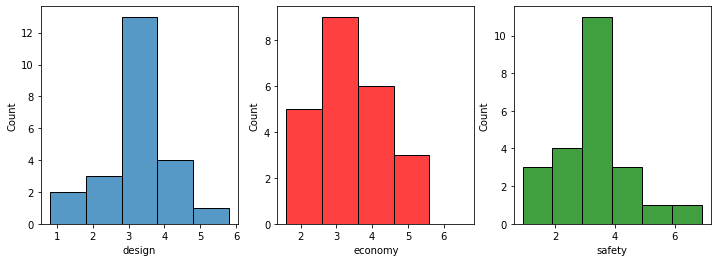

In [87]:
fig, axs = plt.subplots(ncols=3,figsize=(12, 4))
sns.histplot(data=car, x="design",ax=axs[0])
sns.histplot(data=car, x="economy",color='red',ax=axs[1])
sns.histplot(data=car, x="safety",color='green',ax=axs[2])

Ejercicio 4

In [14]:
bills = pd.read_csv('SwissBank 1.txt', sep='\t', header=None)
bills.columns = ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6']

true_bills = bills.iloc[:100, :]
false_bills = bills.iloc[100:, :]
bills.head()

,X_1,X_2,X_3,X_4,X_5,X_6
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8


In [15]:
np.savetxt(r'"C:\Users\danie\OneDrive\Documentos\SwissBank 2.txt"', bills.values, fmt='%d')

In [97]:
# Aplicamos el re-escalamiento
bills['X_1']=bills['X_1'].apply(lambda x: x/10 )
bills['X_2']=bills['X_2'].apply(lambda x: x/10 )
bills['X_3']=bills['X_3'].apply(lambda x: x/10 )
bills['X_6']=bills['X_6'].apply(lambda x: x/10 )
bills.head()



,X_1,X_2,X_3,X_4,X_5,X_6
0,2.148,1.310,1.311,9.0,9.7,1.410
1,2.146,1.297,1.297,8.1,9.5,1.417
2,2.148,1.297,1.297,8.7,9.6,1.422
3,2.148,1.297,1.296,7.5,10.4,1.420
4,2.150,1.296,1.297,10.4,7.7,1.418


In [146]:
center_bills = bills - bills.mean()
cov_matrix = np.cov(center_bills.T)
w, v = eig(cov_matrix)
eigen_vals,eigen_vecs=w,v
v

array([[ 4.97159190e-04,  1.09646427e-04,  5.38738628e-02,
        -6.32408231e-01, -7.66272569e-01, -9.99176018e-02],
       [-1.07441639e-03, -1.28111393e-03, -1.01991846e-01,
        -5.35182550e-01,  3.34235285e-01,  7.69065199e-01],
       [-1.41018253e-03, -1.55498247e-03, -6.51571872e-02,
        -5.57091365e-01,  5.37314843e-01, -6.29834982e-01],
       [-9.93698417e-01,  1.11989439e-01,  4.54664793e-03,
         6.22238325e-04, -8.49075321e-04,  2.03296690e-04],
       [-1.11951610e-01, -9.93683612e-01,  7.60259232e-03,
         1.16583113e-03, -6.82155845e-04,  3.04305661e-04],
       [ 5.18679156e-03,  6.86831509e-03,  9.91146477e-01,
        -5.73317690e-02,  1.11376381e-01,  4.31619483e-02]])

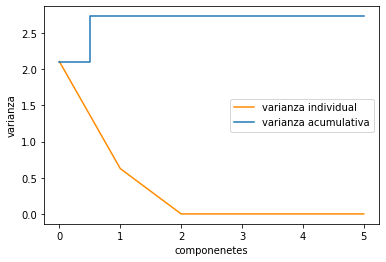

In [117]:
import matplotlib.pyplot as plt
tot= sum(eigen_vals)
var_exp=[ev for ev in sorted(eigen_vals,reverse= True)]
cum_var_exp =np.cumsum(var_exp)
plt.plot(range(0,6),var_exp,label='varianza individual',color='darkorange')
plt.step(range(0,6),cum_var_exp,where='mid',label='varianza acumulativa')
plt.xlabel('componenetes')
plt.ylabel('varianza')
plt.legend(loc='best')
plt.show()

In [101]:
example = bills @ v

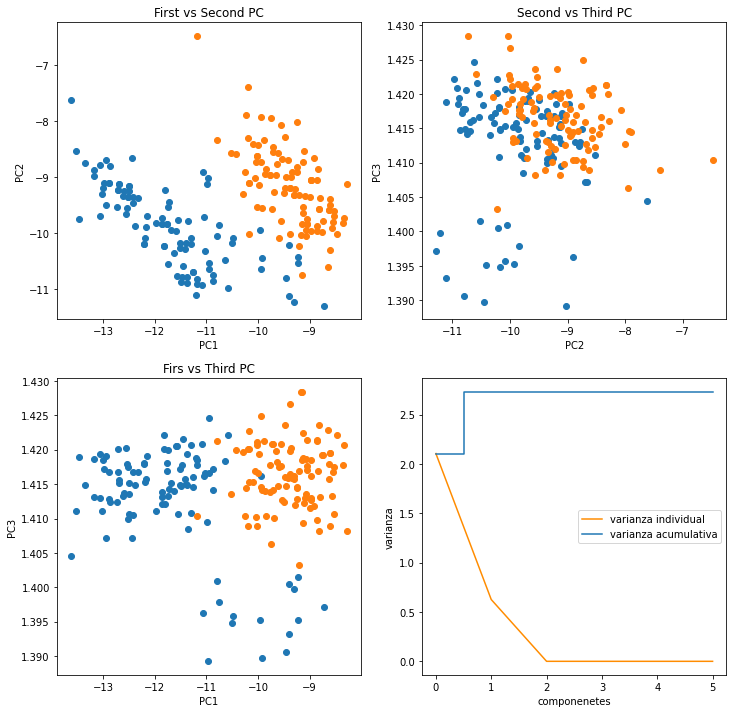

In [144]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(12, 12))
#prinmera
axs[0,0].scatter(x=example.iloc[100:, 0],
        y=example.iloc[100:, 1])
axs[0,0].scatter(x=example.iloc[:100, 0],
        y=example.iloc[:100, 1])
axs[0,0].set_title('First vs Second PC')
axs[0,0].set(xlabel='PC1', ylabel='PC2')
#SEGUNDA
axs[0,1].scatter(x=example.iloc[100:, 1],
        y=example.iloc[100:, 2])
axs[0,1].scatter(x=example.iloc[:100, 1],
        y=example.iloc[:100, 2])
axs[0,1].set_title('Second vs Third PC')
axs[0,1].set(xlabel='PC2', ylabel='PC3')
#tercera
axs[1,0].scatter(x=example.iloc[100:, 0],
        y=example.iloc[100:, 2])
axs[1,0].scatter(x=example.iloc[:100, 0],
        y=example.iloc[:100, 2])
axs[1,0].set_title('Firs vs Third PC')
axs[1,0].set(xlabel='PC1', ylabel='PC3')
#cuarta
axs[1,1].plot(range(0,6),var_exp,label='varianza individual',color='darkorange',)
axs[1,1].step(range(0,6),cum_var_exp,where='mid',label='varianza acumulativa')
plt.xlabel('componenetes')
plt.ylabel('varianza')
plt.legend(loc='best')
plt.show()

Ejercicio 7

In [22]:

car.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,marca,economy,service,value,price,design,sportly,safety,easy
0,BMW3,4.8,1.6,1.9,5.0,2.0,2.5,1.6,2.8
1,CiAX,3.0,3.8,3.8,2.7,4.0,4.4,4.0,2.6
2,Ferr,5.3,2.9,2.2,5.9,1.7,1.1,3.3,4.3
3,FiUn,2.1,3.9,4.0,2.6,4.5,4.4,4.4,2.2
4,FoFi,2.3,3.1,3.4,2.6,3.2,3.3,3.6,2.8


In [23]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = car.loc[:, ['economy','service','value','price','design','sportly','safety','easy']].values
# Separating out the target
y = car.loc[:,['marca']].values


x  = StandardScaler().fit_transform(x)
x

array([[ 1.7856732 , -1.84531839, -1.17597069,  1.485236  , -1.44417531,
        -0.96162483, -1.53702245,  0.02363304],
       [-0.34478416,  0.93364324,  0.6084015 , -0.49383162,  0.96278354,
         0.93130332,  0.64966928, -0.33874023],
       [ 2.37746691, -0.2032047 , -0.89422771,  2.25965377, -1.80521913,
        -2.35641399,  0.01188419,  2.74143255],
       [-1.41001284,  1.05995967,  0.79623016, -0.57987804,  1.56452325,
         0.93130332,  1.01411791, -1.06348676],
       [-1.17329536,  0.04942817,  0.2327442 , -0.57987804,  0.        ,
        -0.16460245,  0.28522066,  0.02363304],
       [-0.93657787,  0.42837748,  0.04491555, -0.92406371,  0.12034794,
        -0.16460245,  0.01188419, -0.7011135 ],
       [ 1.54895572, -0.83478689, -1.45771367,  1.9154681 , -2.2866109 ,
        -1.858275  , -0.44367658,  1.47312611],
       [-0.10806668,  1.05995967,  1.07797313, -1.09615655,  1.32382736,
         1.03093112,  1.28745437,  0.20481967],
       [-0.81821913,  0.30206105

In [24]:
cov_mat=np.cov(x.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
print('Eigenvals:',eigen_vals)
print('eigenvecs:',eigen_vecs)

Eigenvals: [5.63376131 1.929085   0.44233152 0.0373529  0.02844299 0.06210169
 0.11076142 0.11979954]
eigenvecs: [[-0.26785698  0.46930681  0.68081587  0.45994141 -0.00859217  0.0644491
  -0.16944764  0.00271849]
 [ 0.38241266  0.28523414 -0.12174478  0.05966054 -0.21694056 -0.68094733
  -0.38477131  0.30857649]
 [ 0.41010002  0.18124889 -0.04561881  0.20736697  0.79018561 -0.13456854
   0.13716629 -0.30425006]
 [-0.40877357  0.17035644  0.09865125 -0.58160446  0.4959989  -0.1205613
  -0.1285386   0.42286515]
 [ 0.40251176 -0.11245185  0.2216015   0.14033168  0.03801809  0.23012079
   0.42077006  0.72463113]
 [ 0.38197195 -0.10932092  0.62842286 -0.54579695 -0.15355564 -0.13536773
   0.08807154 -0.31571571]
 [ 0.37134859  0.3245322  -0.12925231 -0.2065853  -0.01223097  0.65430719
  -0.51847878  0.01754092]
 [-0.0302867   0.71176014 -0.22164416 -0.2082425  -0.23933337  0.01074385
   0.57816736 -0.09119081]]


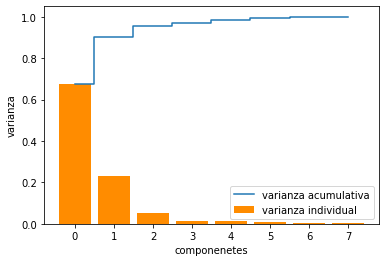

In [57]:
import matplotlib.pyplot as plt
tot= sum(eigen_vals)
var_exp=[ev/tot for ev in sorted(eigen_vals,reverse= True)]
cum_var_exp =np.cumsum(var_exp)
plt.bar(range(0,8),var_exp,label='varianza individual',color='darkorange')
plt.step(range(0,8),cum_var_exp,where='mid',label='varianza acumulativa')
plt.xlabel('componenetes')
plt.ylabel('varianza')
plt.legend(loc='best')
plt.show()